In [1]:
from onedim.inputs import Inputs
from onedim.simulation import Simulation

In [2]:
i = Inputs("tests/inputs.ini")

In [3]:
s = Simulation(i)

Output written to output/output_000000.txt


Timestep:  0   Current time:  0.0
Output written to output/output_000001.txt
Timestep:  1   Current time:  0.0002194480255832972
Output written to output/output_000002.txt
Timestep:  2   Current time:  0.0004388960511665944
Output written to output/output_000003.txt
Timestep:  3   Current time:  0.0006583440767494264
Output written to output/output_000004.txt
Timestep:  4   Current time:  0.0008777657237693065
Output written to output/output_000005.txt
Timestep:  5   Current time:  0.0010969322088216407
Output written to output/output_000006.txt
Timestep:  6   Current time:  0.0013158109261226809
Output written to output/output_000007.txt
Timestep:  7   Current time:  0.0015344271732404286
Output written to output/output_000008.txt
Timestep:  8   Current time:  0.001752874273359664
Output written to output/output_000009.txt
Timestep:  9   Current time:  0.0019712728960400287
Output written to output/output_000010.txt
Timestep:  10   Current time:  0.002189730224457349
Output written to

/Users/chris/Documents/github/cfd/onedim/euler.py:19: RuntimeWarning: invalid value encountered in divide
  E = P / ((gamma - 1) * rho) + 0.5 * u**2
/Users/chris/Documents/github/cfd/onedim/euler.py:83: RuntimeWarning: invalid value encountered in divide
  e = P / ((gamma - 1) * rho)
/Users/chris/Documents/github/cfd/onedim/simulation.py:63: RuntimeWarning: divide by zero encountered in divide
  U_new = np.ones_like(self.grid.grid) / 0  # np.nans_like lol
/Users/chris/Documents/github/cfd/onedim/euler.py:40: RuntimeWarning: invalid value encountered in divide
  prim[UCOMP] = a_cons[MCOMP] / a_cons[RHOCOMP]


Output written to output/output_000014.txt
Timestep:  14   Current time:  0.00306237530272215
Output written to output/output_000015.txt
Timestep:  15   Current time:  0.0032804103440611005
Output written to output/output_000016.txt
Timestep:  16   Current time:  0.0034985202445505744
Output written to output/output_000017.txt
Timestep:  17   Current time:  0.0037167704175775093
Output written to output/output_000018.txt
Timestep:  18   Current time:  0.003935134670692797
Output written to output/output_000019.txt
Timestep:  19   Current time:  0.004153600578704423
Output written to output/output_000020.txt
Timestep:  20   Current time:  0.004372198975131773
Output written to output/output_000021.txt
Timestep:  21   Current time:  0.004590891145140223
Output written to output/output_000022.txt
Timestep:  22   Current time:  0.004809676237504896
Output written to output/output_000023.txt
Timestep:  23   Current time:  0.005028563972338153
Output written to output/output_000024.txt
Times

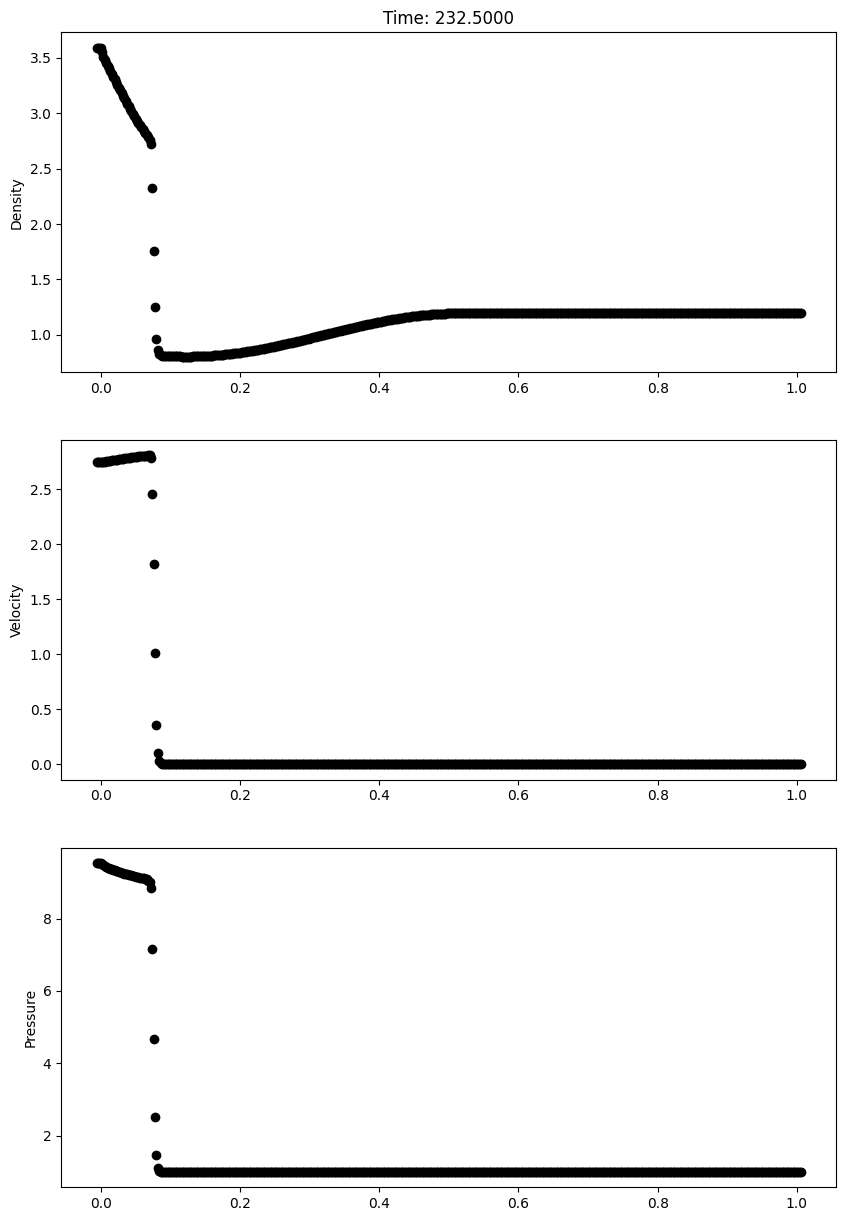

In [4]:
s.run()